In [50]:
%matplotlib inline

# TEC selector

## Case example for calculations

In [51]:
V_MAX = 2.8
I_MAX = 1.9
DELTAT_MAX = 71
Q_C = 1
T_C = 25 + 273.15

## Calculate the effective material properties

In [52]:
def calculate_alpha(T_h, V_max, I_max, DeltaT_max):
    return V_max/T_h
def calculate_R(T_h, V_max, I_max, DeltaT_max):
    alpha = calculate_alpha(T_h, V_max, I_max, DeltaT_max)
    return alpha*(T_h-DeltaT_max)/I_max
def calculate_K(T_h, V_max, I_max, DeltaT_max):
    alpha = calculate_alpha(T_h, V_max, I_max, DeltaT_max)
    R = calculate_R(T_h, V_max, I_max, DeltaT_max)
    return (alpha*(T_h-DeltaT_max))**2/(2*R*DeltaT_max)

### Ploting the effective material properties for an example

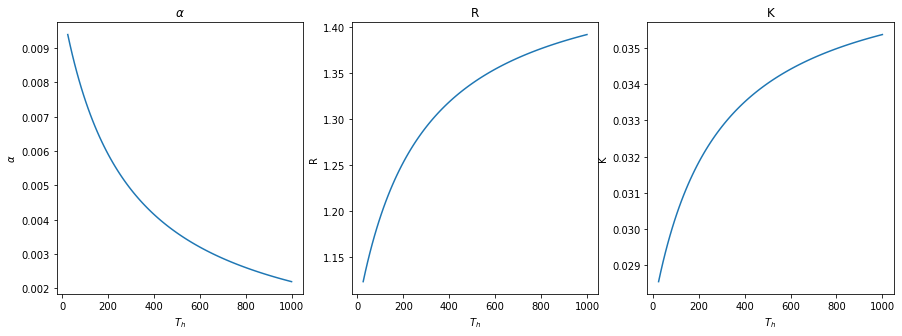

In [53]:
import numpy as np
import matplotlib.pyplot as plt

T_h_C = np.linspace(25, 1000, num=100)
T_h_K = T_h_C + 273.15

alpha = calculate_alpha(T_h_K, V_MAX, I_MAX, DELTAT_MAX)
R = calculate_R(T_h_K, V_MAX, I_MAX, DELTAT_MAX)
K = calculate_K(T_h_K, V_MAX, I_MAX, DELTAT_MAX)

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].plot(T_h_C, alpha)
axs[0].set_title(r'$\alpha$')
axs[0].set(xlabel=r'$T_h$', ylabel=r'$\alpha$')

axs[1].plot(T_h_C, R)
axs[1].set_title('R')
axs[1].set(xlabel=r'$T_h$', ylabel='R')

axs[2].plot(T_h_C, K)
axs[2].set_title('K')
axs[2].set(xlabel=r'$T_h$', ylabel='K')

plt.show()

## Calculate $T_{h,max}$

## Functions to calculate $T_{h,max}$

In [54]:
from scipy.optimize import fsolve
def calculate_Q_cmax(T_h, T_c, V_max, I_max, DeltaT_max):
    alpha = calculate_alpha(T_h, V_max, I_max, DeltaT_max)
    R = calculate_R(T_h, V_max, I_max, DeltaT_max)
    K = calculate_K(T_h, V_max, I_max, DeltaT_max)
    return (alpha*T_c)**2/(2*R) + K*(T_c - T_h)
def function_Q_cmax(T_h, Q_c, T_c, V_max, I_max, DeltaT_max):
    return Q_c - calculate_Q_cmax(T_h, T_c, V_max, I_max, DeltaT_max)
def calculate_T_hmax(Q_c, T_c, V_max, I_max, DeltaT_max):
    T_hmax = fsolve(function_Q_cmax, 298.15, args = (Q_c, T_c, V_max, I_max, DeltaT_max))
    return T_hmax

## Example of calculated $T_{h,max}$

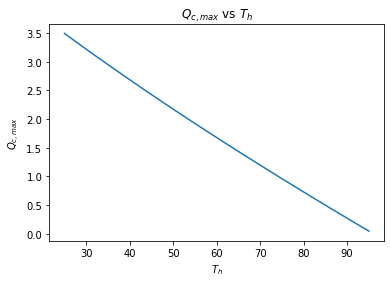

In [55]:
T_h_C = np.linspace(25, 95, num=100)
T_h_K = T_h_C + 273.15

Q_cmax = calculate_Q_cmax(T_h_K, T_C, V_MAX, I_MAX, DELTAT_MAX)

plt.figure()
plt.plot(T_h_C, Q_cmax)
plt.title(r'$Q_{c,max}$ vs $T_h$')
plt.xlabel(r'$T_h$')
plt.ylabel(r'$Q_{c,max}$')
plt.show()

In [56]:
T_hmax_K = calculate_T_hmax(Q_C, T_C, V_MAX, I_MAX, DELTAT_MAX)
T_hmax_C = T_hmax_K - 273.15
print(T_hmax_C)

[74.13274912]


## Calculate I

### Functions to calculate I

In [57]:
def calculate_I(T_h, Q_c, T_c, V_max, I_max, DeltaT_max):
    alpha = calculate_alpha(T_h, V_max, I_max, DeltaT_max)
    R = calculate_R(T_h, V_max, I_max, DeltaT_max)
    K = calculate_K(T_h, V_max, I_max, DeltaT_max)
    return alpha*T_c/R - np.sqrt((alpha*T_c/R)**2 - 2*(Q_c+K*(T_h-T_c))/R)

### Example of calculation of I

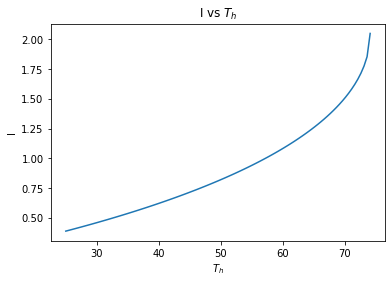

In [58]:
T_h_C = np.linspace(25, T_hmax_C, num=100)
T_h_K = T_h_C + 273.15
I = calculate_I(T_h_K, Q_C, T_C, V_MAX, I_MAX, DELTAT_MAX)

plt.figure()
plt.plot(T_h_C, I)
plt.title(r'I vs $T_h$')
plt.xlabel(r'$T_h$')
plt.ylabel('I')
plt.show()

## Calculate COP

### Function to calculate COP

In [59]:
def calculate_COP(I, T_h, Q_c, T_c, V_max, I_max, DeltaT_max):
    alpha = calculate_alpha(T_h, V_max, I_max, DeltaT_max)
    R = calculate_R(T_h, V_max, I_max, DeltaT_max)
    K = calculate_K(T_h, V_max, I_max, DeltaT_max)
    I = calculate_I(T_h, Q_c, T_c, V_max, I_max, DeltaT_max)
    return (alpha*T_c*I - (I**2)*R/2 + K*(T_c - T_h))/(alpha*I*(T_h - T_c) + (I**2)*R)

### Example of calculated COP

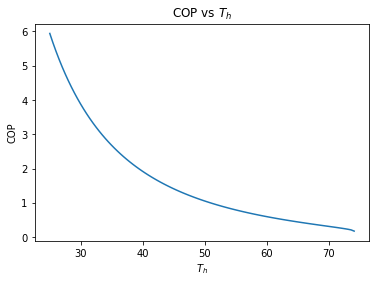

In [60]:
cop = calculate_COP(I, T_h_K, Q_C, T_C, V_MAX, I_MAX, DELTAT_MAX)

plt.figure()
plt.plot(T_h_C, cop)
plt.title(r'COP vs $T_h$')
plt.xlabel(r'$T_h$')
plt.ylabel('COP')
plt.show()

## The widget

In [115]:
import ipywidgets as widgets
from IPython.display import display, clear_output

V_max_slider = widgets.FloatSlider(
    value=2.8,
    min=1.,
    max=10.0,
    step=0.1,
    description=r'$V_{max}$:',
    readout_format='.1f',
)

I_max_slider = widgets.FloatSlider(
    value=1.9,
    min=0.5,
    max=70.,
    step=0.1,
    description=r'$I_{max}$:',
    readout_format='.1f',
)
DeltaT_max_slider = widgets.FloatSlider(
    value=71.,
    min=40,
    max=140.,
    step=0.1,
    description=r'$\Delta T_{max}$:',
    readout_format='.1f',
)

Q_c_slider = widgets.FloatSlider(
    value=1.,
    min=0.1,
    max=340,
    step=0.1,
    description=r'$Q_c$:',
    readout_format='.1f',
)

T_c_slider = widgets.FloatSlider(
    value=25.,
    min=-50,
    max=140,
    step=0.1,
    description=r'$T_c$:',
    readout_format='.1f',
)

widgets.VBox(children=[V_max_slider, I_max_slider, DeltaT_max_slider, Q_c_slider, T_c_slider])


In [142]:
button = widgets.Button(description="Plot")
output = widgets.Output()

display(button, output)

plot_conditions = []

def on_button_clicked(b):
    with output:
        new_plot_condition = {
            'Q_C' : Q_c_slider.value,
            'T_C_C' : T_c_slider.value,
            'V_MAX' : V_max_slider.value,
            'I_MAX' : I_max_slider.value,
            'DELTAT_MAX' : DeltaT_max_slider.value
        }        
        plot_conditions.append(new_plot_condition)
        
        solutions = []
        for  plot_condition in plot_conditions: 
            Q_C = plot_condition['Q_C']
            T_C_C = plot_condition['T_C_C'] 
            T_C_K = T_C_C + 273.15 
            V_MAX = plot_condition['V_MAX']
            I_MAX = plot_condition['I_MAX']
            DELTAT_MAX = plot_condition['DELTAT_MAX']

            T_hmax_K = calculate_T_hmax(Q_C, T_C_K, V_MAX, I_MAX, DELTAT_MAX)
            T_hmax_C = T_hmax_K - 273.15

            T_h_C = np.linspace(T_C_C, T_hmax_C, num=100)
            T_h_K = T_h_C + 273.15
            I = calculate_I(T_h_K, Q_C, T_C, V_MAX, I_MAX, DELTAT_MAX)
            cop = calculate_COP(I, T_h_K, Q_C, T_C, V_MAX, I_MAX, DELTAT_MAX)
            solution = {
                'T_h' : T_h_C,
                'Q_C' : Q_C,
                'I' : I,
                'COP' : cop                
            }
            solutions.append(solution)
            
        clear_output()
        plt.figure(1)
        for solution in solutions:
            T_h_C = solution['T_h']
            cop = solution['COP']
            Q_C = solution['Q_C']
            label_string = r'$Q_c = $' + str(Q_C)
            plt.plot(T_h_C, cop, label = label_string)   
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.title(r'COP vs $T_h$')
        plt.xlabel(r'$T_h$')
        plt.ylabel('COP')
        
        plt.figure(2)
        for solution in solutions:
            T_h_C = solution['T_h']
            I = solution['I']
            Q_C = solution['Q_C']
            label_string = r'$Q_c = $' + str(Q_C)
            plt.plot(T_h_C, I, label = label_string)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.title(r'I vs $T_h$')
        plt.xlabel(r'$T_h$')
        plt.ylabel('I')

        plt.show()

button.on_click(on_button_clicked)

Button(description='Plot', style=ButtonStyle())

Output()